In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import metrics
from random import randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
#load train data and validation data
train_data= pd.read_csv("/Users/dean/Desktop/Web economics/data/train.csv")
test_data= pd.read_csv("/Users/dean/Desktop/Web economics/data/test.csv")
validation_data= pd.read_csv("/Users/dean/Desktop/Web economics/data/validation.csv")
train_data.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697738 entries, 0 to 2697737
Data columns (total 26 columns):
click             int64
weekday           int64
hour              int64
bidid             object
logtype           int64
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(12), object(14)
memory usage: 535.1+ MB


In [9]:
train_data.iloc[0]

click                                            0
weekday                                          1
hour                                            14
bidid             fdfae6789b787899f1b875de3ab8b21a
logtype                                          1
userid                           u_Vh1OPkFv3q5CFdR
useragent                               windows_ie
IP                                   180.107.112.*
region                                          80
city                                            85
adexchange                                       2
domain                        trqRTuToMTNUjM9r5rMi
url               d48a96ab59d7ad741a48e781de44efeb
urlid                                         null
slotid                                   433287550
slotwidth                                      468
slotheight                                      60
slotvisibility                                   1
slotformat                                       0
slotprice                      

In [4]:
sta_train = train_data.advertiser.unique()
table = pd.DataFrame(columns=['advertiser', 'num_imp', 'num_clicks', 'costs', 'CTR', 'avgCPM', 'eCPC'])
for i in range(len(sta_train)):
    adver = sta_train[i]
    df = train_data[train_data.advertiser == adver]
    clicks = df.click.sum()
    imps = df.bidid.count()
    costs = df.payprice.sum() / 1000
    CTR = ((clicks / imps) * 100)
    avgCPM = ((costs / imps) * 1000)
    eCPC = (costs / clicks)
    table.loc[i] = [adver, imps, clicks, costs, CTR, avgCPM, eCPC]
table

,advertiser,num_imp,num_clicks,costs,CTR,avgCPM,eCPC
0,1458.0,540293.0,451.0,37231.239,0.083473,68.909349,82.552636
1,3476.0,346778.0,175.0,27481.402,0.050465,79.247824,157.036583
2,3427.0,454031.0,340.0,36820.111,0.074885,81.096029,108.294444
3,3358.0,304782.0,233.0,28145.288,0.076448,92.345637,120.795227
4,2259.0,146778.0,45.0,13649.026,0.030659,92.990952,303.311689
5,2821.0,231416.0,144.0,20625.766,0.062226,89.128522,143.234486
6,3386.0,498554.0,358.0,38341.028,0.071808,76.904464,107.097844
7,2997.0,54487.0,251.0,3413.227,0.460660,62.642961,13.598514
8,2261.0,120619.0,37.0,10789.152,0.030675,89.448196,291.598703


In [16]:
sta_val= validation_data.advertiser.unique()
table = pd.DataFrame(columns=['advertiser', 'num_imp', 'num_clicks', 'costs', 'CTR', 'avgCPM', 'eCPC'])
for i in range(len(sta_val)):
    adver = sta_val[i]
    df = validation_data[validation_data.advertiser == adver]
    clicks = df.click.sum()
    imps = df.bidid.count()
    costs = df.payprice.sum() / 1000
    CTR = ((clicks / imps) * 100)
    #conversion = df['logtype'][df.logtype == 3].count()
    #CVR = ((conversion / imps) * 100)
    avgCPM = ((costs / imps) * 1000)
    eCPC = (costs / clicks)
    table.loc[i] = [adver, imps, clicks, costs, CTR, avgCPM, eCPC]
table

,advertiser,num_imp,num_clicks,costs,CTR,avgCPM,eCPC
0,3427.0,50381.0,45.0,4077.433,0.089319,80.931958,90.609622
1,2997.0,6034.0,26.0,387.384,0.430892,64.200199,14.899385
2,3386.0,55196.0,33.0,4255.466,0.059787,77.097362,128.953515
3,3476.0,38839.0,13.0,3062.553,0.033472,78.852519,235.581000
4,2821.0,25632.0,16.0,2281.452,0.062422,89.007959,142.590750
5,1458.0,60025.0,50.0,4139.185,0.083299,68.957684,82.783700
6,3358.0,33853.0,27.0,3125.839,0.079757,92.335657,115.771815
7,2261.0,13370.0,5.0,1196.249,0.037397,89.472625,239.249800
8,2259.0,16419.0,11.0,1519.657,0.066996,92.554784,138.150636


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
advs = [3427, 2997, 3386, 3476, 2821]
dataframes = []
for sta_train in advs:
    df = train_data[train_data['advertiser'] == sta_train]
    ctr = df.groupby('weekday').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

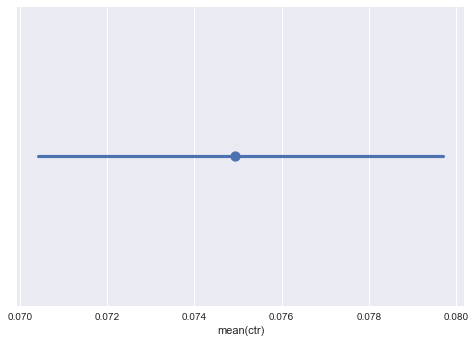

In [10]:
#sns.pointplot(y=dataframes[0]['ctr'], c='b',label='user'+str(advs[0]), marker='*')


In [14]:
#plt.plot(dataframes[0]['ctr'], c='b',label='user'+str(advs[0]), marker='*')
dataframes[1]

,click,imps,ctr
weekday,,,
2,87,9621,0.904272
3,68,15951,0.426306
4,69,19046,0.362281
5,27,9869,0.273584


In [ ]:

#sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

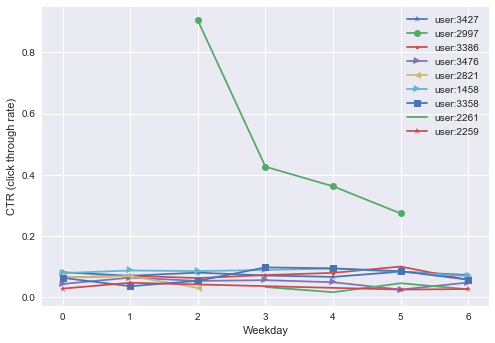

In [26]:
advs = [3427, 2997, 3386, 3476, 2821,1458,3358,2261,2259]
dataframes = []
for sta_train in advs:
    df = train_data[train_data['advertiser'] == sta_train]
    ctr = df.groupby('weekday').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)
plt.plot(dataframes[0]['ctr'], c='C0',label='user:'+str(advs[0]), marker='*')
plt.plot(dataframes[1]['ctr'], c='C1',label='user:'+str(advs[1]), marker='o')
plt.plot(dataframes[2]['ctr'], c='C2',label='user:'+str(advs[2]), marker='.')
plt.plot(dataframes[3]['ctr'], c='C3',label='user:'+str(advs[3]), marker='>')
plt.plot(dataframes[4]['ctr'], c='C4',label='user:'+str(advs[4]), marker='<')
plt.plot(dataframes[5]['ctr'], c='C5',label='user:'+str(advs[5]), marker='>')
plt.plot(dataframes[6]['ctr'], c='C6',label='user:'+str(advs[6]), marker='s')
plt.plot(dataframes[7]['ctr'], c='C7',label='user:'+str(advs[7]), marker='+')
plt.plot(dataframes[8]['ctr'], c='C8',label='user:'+str(advs[8]), marker='*')
#plt.plot(dataframes[9]['ctr'], c='m',label='user'+str(advs[9]), marker='>')

plt.ylabel('CTR (click through rate)')
plt.xlabel('Weekday')
plt.margins(0.05)
plt.legend()
#plt.show()
plt.savefig('CTR_ALL_WEEK.png',dpi=400)

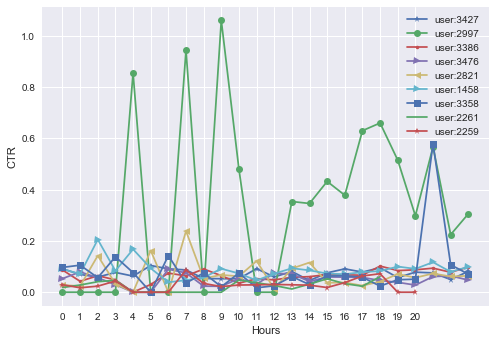

In [28]:
dataframes = []
for adv in advs:
    df = train_data[train_data['advertiser'] == adv]
    ctr = df.groupby('hour').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

plt.plot(dataframes[0]['ctr'], c='C0',label='user:'+str(advs[0]), marker='*')
plt.plot(dataframes[1]['ctr'], c='C1',label='user:'+str(advs[1]), marker='o')
plt.plot(dataframes[2]['ctr'], c='C2',label='user:'+str(advs[2]), marker='.')
plt.plot(dataframes[3]['ctr'], c='C3',label='user:'+str(advs[3]), marker='>')
plt.plot(dataframes[4]['ctr'], c='C4',label='user:'+str(advs[4]), marker='<')
plt.plot(dataframes[5]['ctr'], c='C5',label='user:'+str(advs[5]), marker='>')
plt.plot(dataframes[6]['ctr'], c='C6',label='user:'+str(advs[6]), marker='s')
plt.plot(dataframes[7]['ctr'], c='C7',label='user:'+str(advs[7]), marker='+')
plt.plot(dataframes[8]['ctr'], c='C8',label='user:'+str(advs[8]), marker='*')
plt.ylabel('CTR')
plt.xlabel('Hours')
plt.xticks(df.hour.unique())
plt.margins(0.05)
plt.legend()
#plt.show()
plt.savefig('CTR_ALL_HOUR.png',dpi=400)

In [47]:
dataframes = []
for adv in advs:
    df = train_data[train_data['advertiser'] == adv]
    ctr = df.groupby('adexchange').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

plt.bar(np.array(dataframes[0]['ctr']), c='C0',label='user:'+str(advs[0]), marker='*')
plt.bar(dataframes[1]['ctr'], c='C1',label='user:'+str(advs[1]), marker='o')
plt.bar(dataframes[2]['ctr'], c='C2',label='user:'+str(advs[2]), marker='.')
plt.plot(dataframes[3]['ctr'], c='C3',label='user:'+str(advs[3]), marker='>')
plt.plot(dataframes[4]['ctr'], c='C4',label='user:'+str(advs[4]), marker='<')
plt.plot(dataframes[5]['ctr'], c='C5',label='user:'+str(advs[5]), marker='>')
plt.plot(dataframes[6]['ctr'], c='C6',label='user:'+str(advs[6]), marker='s')
plt.plot(dataframes[7]['ctr'], c='C7',label='user:'+str(advs[7]), marker='+')
plt.plot(dataframes[8]['ctr'], c='C8',label='user:'+str(advs[8]), marker='*')
plt.ylabel('CTR')
plt.xlabel('Region')
plt.xticks(df.hour.unique())
plt.margins(0.05)
plt.legend()
#plt.show()
plt.savefig('CTR_ALL_REGION.png',dpi=400)

TypeError: bar() missing 1 required positional argument: 'height'

In [45]:
plt.bar(dataframes[0]['ctr'])#, c='C0')#,label='user:'+str(advs[0]), marker='*')


TypeError: bar() missing 1 required positional argument: 'height'

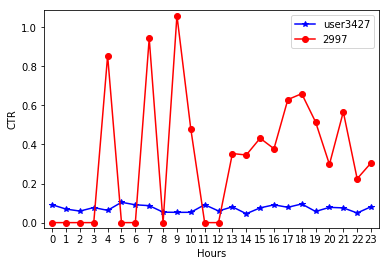

In [45]:
dataframes = []
for adv in advs:
    df = train_data[train_data['advertiser'] == adv]
    ctr = df.groupby('hour').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

plt.plot(dataframes[0]['ctr'], label='user'+str(advs[0]), marker='*', c='b')
plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='o', c='r')

plt.ylabel('CTR')
plt.xlabel('Hours')
plt.xticks(df.hour.unique())
plt.margins(0.025)
plt.legend()
plt.show()

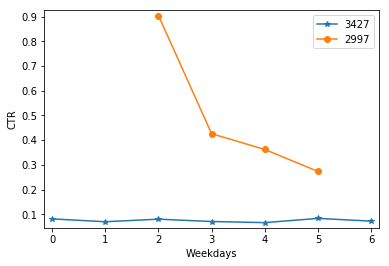

In [36]:
advs = [3427, 2997, 3386, 3476, 2821]
dataframes = []
for sta_train in advs:
    df = train_data[train_data['advertiser'] == sta_train]
    ctr = df.groupby('weekday').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)
plt.plot(dataframes[0]['ctr'], label=str(advs[0]), marker='*')
plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='o')

plt.ylabel('CTR')
plt.xlabel('Weekdays')
plt.margins(0.025)
plt.legend()
plt.show()